In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [2]:
# importing data
data = pd.read_csv(r"C:\Users\hp\Desktop\Data analysis\Python\Project\insurance\insurance.csv")

In [4]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
# number of rows and columns of dataset
data.shape

(1338, 7)

In [7]:
# statistical description of data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

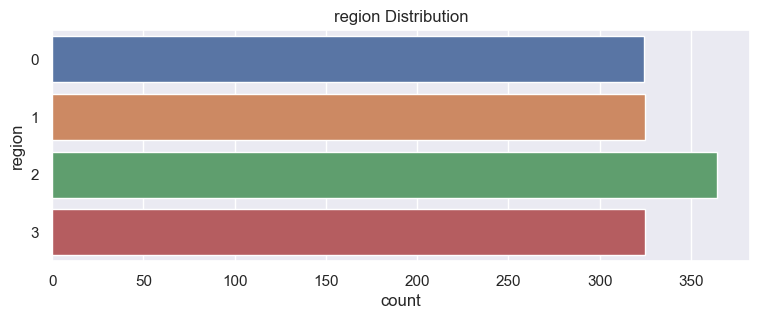

In [30]:
plt.figure(figsize=(9, 3))
sns.countplot(y = data['region'])
plt.title('region Distribution')
plt.show();

- More of the patients (27%) are from region 2.

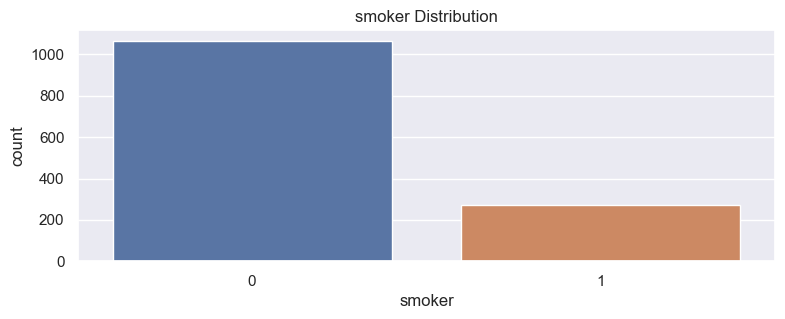

In [24]:
plt.figure(figsize=(9, 3))
sns.countplot(x = data['smoker'])
plt.title('smoker Distribution')
plt.show();

- 80% of the patients are non-smokers

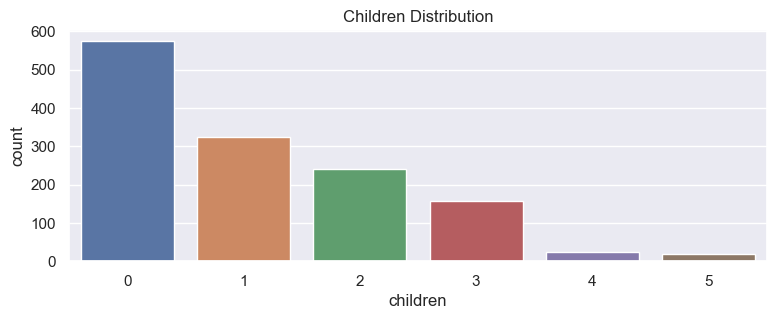

In [23]:
plt.figure(figsize=(9, 3))
sns.countplot(x = data['children'])
plt.title('Children Distribution')
plt.show();

- Majority of the patients have no children

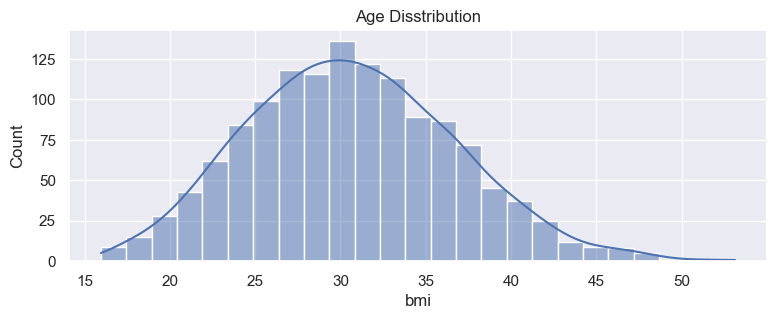

In [78]:
plt.figure(figsize=(9, 3))
sns.histplot(data['bmi'], kde=True)
plt.title('Age Disstribution')
plt.show();

- Normal weight is between 18.5 to 24.9. 
- The graph above which shows a normal distribution of the bmi values.
- More than 75% of the patients are overweight.

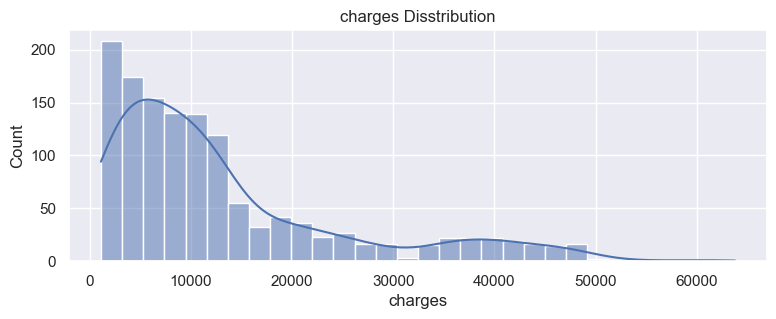

In [80]:
plt.figure(figsize=(9, 3))
sns.histplot(data['charges'], kde=True)
plt.title('charges Disstribution')
plt.show();

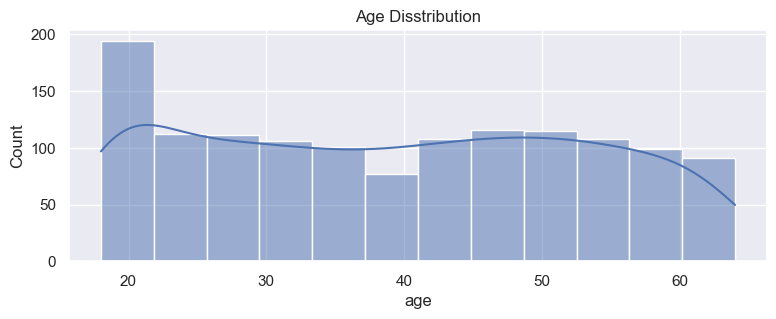

In [81]:
sns.set()
plt.figure(figsize=(9, 3))
sns.histplot(data['age'], kde=True)
plt.title('Age Disstribution')
plt.show();

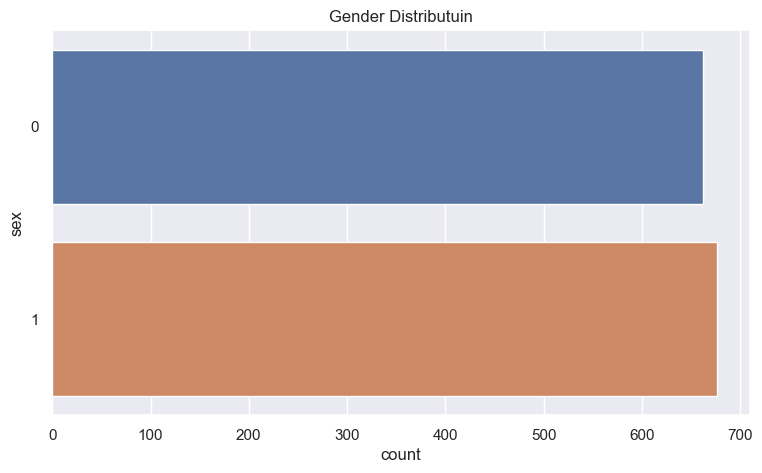

In [18]:
plt.figure(figsize=(9,5))
sns.countplot(y=data['sex'])
plt.title('Gender Distributuin')
plt.show();

In [19]:
data.sex.value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [11]:
# encoding categorical column
s = (data.dtypes == "object")
cat_var = list(s[s].index)

encoder = LabelEncoder()
for i in cat_var:
    data[i] = data[[i]].apply(encoder.fit_transform)

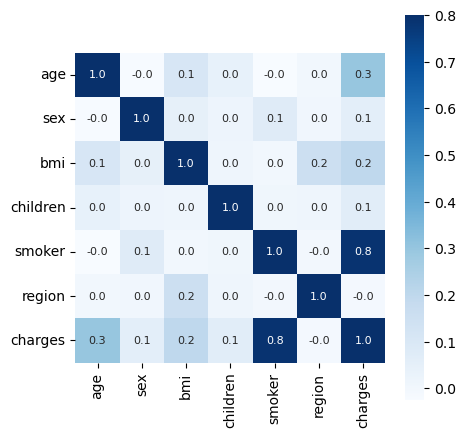

In [12]:
# plotting correlation chart
plt.figure(figsize=(5,5))
a = data.corr()
sns.heatmap(a, vmax=.8, square=True, annot=True, fmt='.1f', cbar=True, annot_kws={'size':8}, cmap='Blues');

In [40]:
# splitting data into target and label
x = data.drop('charges', axis=1)
y = data['charges']

In [41]:
# scale dataset features
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

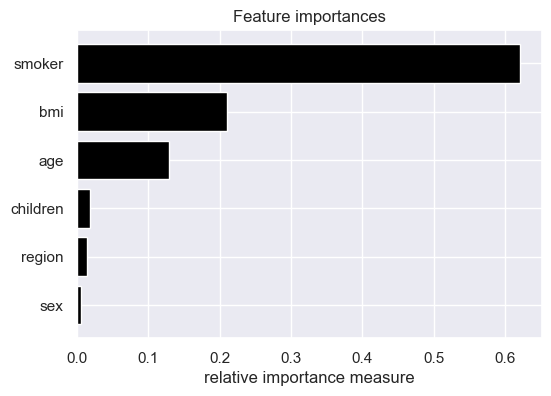

In [43]:
#identifying key featurs from the data set

# using a random classifier model to identify the importance features

# fit the model
model = RandomForestRegressor()
model.fit(x,y)
importances = model.feature_importances_
sort_imp = np.argsort(importances)
names = list(x.columns)

#plot feature importance chart
plt.figure(figsize=(6,4))
plt.barh(range(len(sort_imp)),importances[sort_imp], color="black")
plt.yticks(range(len(sort_imp)),[names[x] for x in sort_imp])
plt.title("Feature importances")
plt.xlabel("relative importance measure");

In [44]:
# splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [82]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [45]:
# List of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=0),
    XGBRegressor()
]

def compare_models(x, y):
    results = []
    for model in models:
        # Compute mean squared error (MSE) using cross-validation
        cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
        mean_mse = np.mean(-cv_scores)
        
        # Compute R2 score using cross-validation
        cv_r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
        mean_r2 = np.mean(cv_r2_scores)
        
        results.append({
            'Model': model.__class__.__name__,
            'Mean Squared Error (MSE)': mean_mse,
            'R2 Score': mean_r2
        })
    
    return pd.DataFrame(results)

# Call the function to compare models
results_df = compare_models(x, y)
print(results_df)

                   Model  Mean Squared Error (MSE)  R2 Score
0       LinearRegression              3.686240e+07  0.747256
1                  Ridge              3.686588e+07  0.747259
2                  Lasso              3.686104e+07  0.747268
3                    SVR              1.607557e+08 -0.097528
4    KNeighborsRegressor              3.276769e+07  0.775169
5  RandomForestRegressor              2.376643e+07  0.836033
6           XGBRegressor              2.817747e+07  0.805816


In [49]:
# List of models with their corresponding hyperparameters
models_parameters = [
    (LinearRegression(), {'fit_intercept': [True, False]}),
    (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    (SVR(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
    (KNeighborsRegressor(), {'n_neighbors': [3, 5, 10]}),
    (RandomForestRegressor(random_state=0), {'n_estimators': [10, 20, 50, 100], 'max_depth': [None, 10, 20]}),
    (XGBRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]})
]

def modelSelection(models_parameters, x, y):
    results = []
    
    for model, params in models_parameters:
        regressor = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        regressor.fit(x, y)
        
        results.append({
            'model used': model.__class__.__name__,
            'highest score': -regressor.best_score_,
            'best hyperparameters': regressor.best_params_
        })
        
    return pd.DataFrame(results, columns=['model used', 'highest score', 'best hyperparameters'])

# Call the function
models_comparison_results = modelSelection(models_parameters, x, y)
print(models_comparison_results)

              model used  highest score  \
0       LinearRegression   3.686240e+07   
1                  Ridge   3.686194e+07   
2                  Lasso   3.685646e+07   
3                    SVR   1.415975e+08   
4    KNeighborsRegressor   3.194037e+07   
5  RandomForestRegressor   2.327621e+07   
6           XGBRegressor   2.196100e+07   

                           best hyperparameters  
0                       {'fit_intercept': True}  
1                                {'alpha': 0.1}  
2                               {'alpha': 10.0}  
3               {'C': 10.0, 'kernel': 'linear'}  
4                           {'n_neighbors': 10}  
5        {'max_depth': 10, 'n_estimators': 100}  
6  {'learning_rate': 0.05, 'n_estimators': 100}  


#### Selecting LinearRegression() model to work with

In [68]:
### using LinearRegression model
lg = Ridge()

In [69]:
lg.fit(x_train, y_train)

Ridge()

In [70]:
# Model accuracy evaluation using training data
train_pred = lg.predict(x_train)

# r squared error
score = metrics.r2_score(y_train, train_pred)
print("r2_score: ", score)

# Mean Absolute Error
score2 = metrics.mean_absolute_error(y_train, train_pred)
print("MAE: ", score2)

r2_score:  0.7519306334812934
MAE:  4135.651585235306


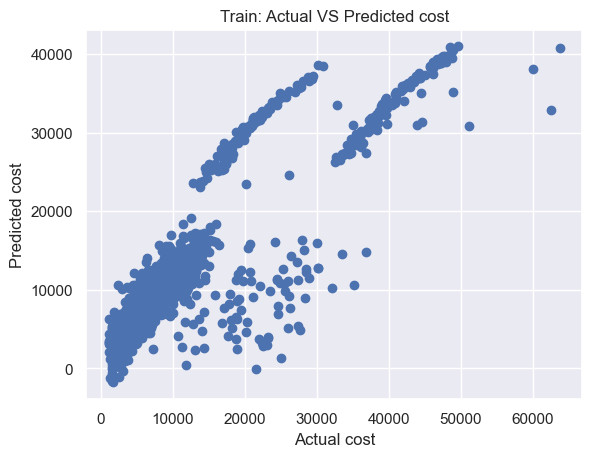

In [54]:
# visualize actual prices and predicted prices
plt.scatter(y_train, train_pred)
plt.xlabel('Actual cost')
plt.ylabel('Predicted cost')
plt.title('Train: Actual VS Predicted cost')
plt.show();

In [71]:
# Model accuracy evaluation using training data
test_pred = lg.predict(x_test)

# r squared error
score = metrics.r2_score(y_test, test_pred)
print("r2_score: ", score)

# Mean Absolute Error
score2 = metrics.mean_absolute_error(y_test, test_pred)
print("MAE: ", score2)

r2_score:  0.744436756334857
MAE:  4265.72170651865


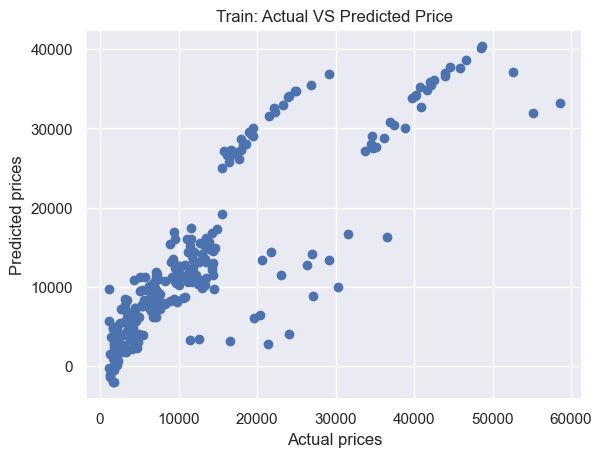

In [55]:
# visualize actual prices and predicted prices
plt.scatter(y_test, test_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Train: Actual VS Predicted Price')
plt.show();

In [76]:
# Buiding a predictive system
def predict_charges(data, model, scaler, encoder):
    # Convert input data type to numpy array
    input_arr = np.asarray(data)
    
    # Reshape the array because we are predicting for 1 instance
    input_arr2 = input_arr.reshape(1, -1)
    
    # Encode categorical variables
    # Find categorical variables
    cat_indices = np.where(input_arr2.dtype == 'object')[0]
    for i in cat_indices:
        input_arr2[:, i] = encoder.fit_transform(input_arr2[:, i].reshape(-1, 1)).reshape(1, -1)
    
    # Standardize data
    stdz_input = scaler.transform(input_arr2)
    
    # Make prediction
    prediction = model.predict(stdz_input)
    
    print("The insurance cost is: ", prediction[0])

In [84]:
input_data = np.array([[19, 0, 32, 0, 0, 1]])
result = predict_charges(input_data, model, scaler, encoder)

The insurance cost is:  2140.4074345000017


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [57]:
data.loc[200]

age           19.0000
sex            0.0000
bmi           32.1100
children       0.0000
smoker         0.0000
region         1.0000
charges     2130.6759
Name: 200, dtype: float64